In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)

df.head()
#checked for NaNs
#df.isnull().sum().sum()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

In [3]:
# Pull column headers for use 
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [4]:
#isolate X matrix 
xcols = ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']
X = df[xcols].values

#isolate y vector 
y = df['price']

print(X.shape)
print(y.shape)

(8495, 8)
(8495,)


## 1.2 Split the data into test and train datasets using train_test_split

In [5]:
#splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
#choose model 
model = LinearRegression()

#fit data to model
model.fit(X_train, Y_train)

#make prediction for later use 
y_pred = model.predict(X_test)


## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
#pull coefficients from model 
print("coefficients: ", model.coef_)

#pull intercepts from model 
print("intercepts: ", model.intercept_)

coefficients:  [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]
intercepts:  -2184591.0115608745


## 1.5 Use the test data to make predictions

In [8]:
#code for this is up in section 1.3 
y_pred

array([18501.5313198 ,  5449.53615628, 25121.57031334, ...,
       20204.90435025, 21612.72025077,  8218.38709262])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [9]:
#creates RSME 
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))

#creates R^2
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


RMSE is 22470.105634468673
R^2 is 0.2694482951962187


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient corresponding to year shows the amount of change in price for one unit of year. 

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE tells us how far our predictions are from the true value. 

## 1.9 How should we interpret the $R^2$?

A higher R^2 value indicates a well fitting regression while a lower valueindicates ill fit. The R^2in this case look to be ill fitting 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [10]:
#making new variable from log of price 
df['log_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

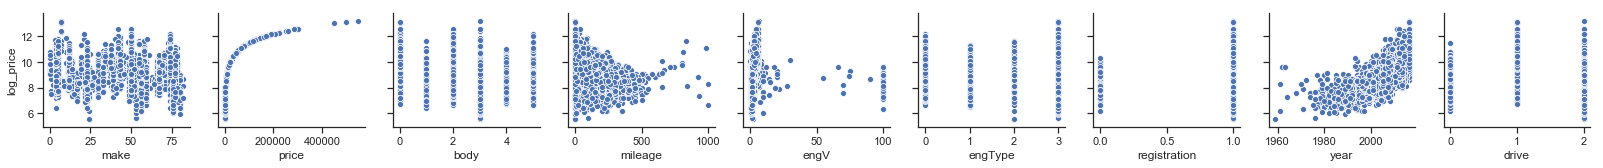

In [11]:
#set some plot parameters 
sns.set(style="ticks", color_codes=True)

# make columns drop new price
x_columns = df.columns.drop('log_price')

# plot the x variables with our y 
sns.pairplot(data=df, y_vars=['log_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

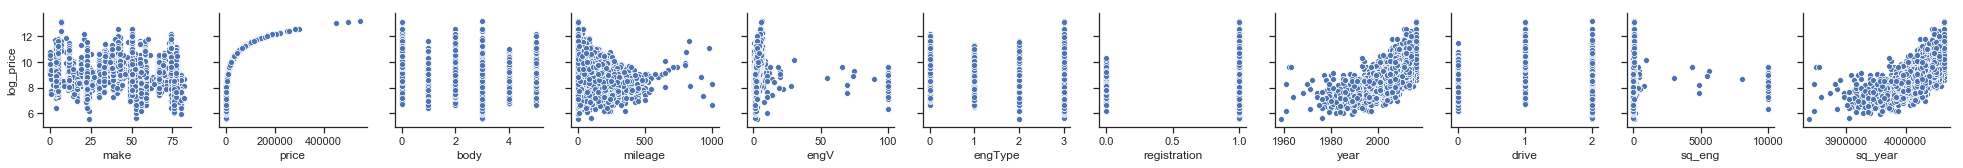

In [12]:
#makes polyfeature sq_eng from squareing eng feature 
df['sq_eng'] = df['engV']**2

#makes polyfeature sq_year from squareing year feature
df['sq_year'] = df['year']**2

#sets some plot parameters 
sns.set(style="ticks", color_codes=True)

# make columns drops log_price
x_columns = df.columns.drop('log_price')

# plot the x variables with our y 
sns.pairplot(data=df, y_vars=['log_price'], x_vars=x_columns);

In [13]:
#pulls column headers for future use
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'log_price', 'sq_eng', 'sq_year'],
      dtype='object')

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [14]:
#use column headers from above to make list of column names 
cols = ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'sq_year', 'sq_eng']

#make X matrix
X = df[cols]

#create y vector 
y = df['log_price']

#new split because data has changed 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

#choose model 
model = LinearRegression()

#fit data to model
model.fit(X_train, Y_train)

#make prediction for later use 
y_pred = model.predict(X_test)

#create RMSE 
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))

#create R^2
R2 = r2_score(Y_test, y_pred)

print("intercept:\n", model.intercept_)
print("coefficients:\n ", model.coef_)
print('\n RMSE is {}'.format(RMSE))
print('\n R^2 is {}'.format(R2))


intercept:
 6418.80453206973
coefficients:
  [-1.06018889e-03 -6.52442797e-02  5.23267825e-04  2.47497502e-01
 -4.47521424e-02  7.03413146e-01 -6.50299838e+00  2.65189582e-01
  1.64861679e-03 -2.47622387e-03]

 RMSE is 0.4937242273788119

 R^2 is 0.7410779150609383


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient for year is now in percent notation. percent of change in price for each unit of year.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seeks to find a funtions minimum through iteration. 

## 3.2 What is the "Learning Rate" and what is its function?

The function of learning rate is to set the initial size of steps for the algorithim. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [15]:
#make list of column headers
cols = ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'sq_year', 'sq_eng']
#create X matrix
X = df[cols]

#create y vector 
y = df['log_price']

#add row of ones to avoid explosions and such 
X = sm.add_constant(X)

#Fit model with robust standard scaler
model = sm.OLS(y, X).fit(cov_type='HC3')

#make predictions 
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2194.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:55:24   Log-Likelihood:                -5940.3
No. Observations:                8495   AIC:                         1.190e+04
Df Residuals:                    8484   BIC:                         1.198e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6816.3696    650.840     10.473   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [16]:
#X = X.drop(columns= ['const'],axis = 1)

#load values for function
x1 =X.values

#run function 
vif = [variance_inflation_factor(x1, i) for i in range(X.shape[1])]

print(X.columns)
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'sq_year', 'sq_eng'],
      dtype='object')
[2955721034.5224624, 1.062330621795671, 1.1769060014967925, 1.9415284391943093, 23.631784179204377, 1.1547690664258476, 1.1087336285334002, 141808.294379012, 1.2492722721919924, 142050.7003991063, 23.482758835638975]


Columns that show VIF scores >10 show high multicollinearity. In our case those are the columns for :'engV', 'registration', 'year'and the polynomial coulumns I added for 'sq_year' and 'sq_eng'. The high VIF for the 2 engine categories and the 2 year categories are understandable. But the 'registration' column has not been modified. 

# Running another VIF with poly features left out

In [17]:
X = X.drop(columns= ['sq_year', 'sq_eng'],axis = 1)

In [18]:
x1 =X.values
vif = [variance_inflation_factor(x1, i) for i in range(X.shape[1])]
print(X.columns)
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')
[123262.01363199769, 1.0591492515492278, 1.158325600133946, 1.5496097971160896, 1.0093210319338706, 1.141182850737346, 1.0918920928785212, 1.4585277185506424, 1.1310208897031042]


With poly features left out there still appear to be some multicolinearity issues with both the 'registration' and 'year' columns 